## Imports 

In [81]:
import pandas as pd 
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold
from missforest import MissForest
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
import shap
from sklearn.inspection import permutation_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from statsmodels.tools.tools import add_constant
from sklearn.metrics import accuracy_score, f1_score,roc_auc_score,precision_score, recall_score
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error, accuracy_score, classification_report, mean_absolute_error, mean_squared_error
from sklearn.metrics import *
#from imblearn.metrics import specificity_score
from sklearn.ensemble import RandomForestRegressor
import joblib
import os
from sklearn.model_selection import GridSearchCV


## Load data 

In [82]:
df = pd.read_csv("/workspaces/carlossuesc95-intro-ml/data/raw/internal-link tree.csv")
#df.shape(768,9)
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Pregnancies,6.000,1.000,8.000,1.000,0.000,5.000,3.000,10.000,2.000,8.000
Glucose,148.000,85.000,183.000,89.000,137.000,116.000,78.000,115.000,197.000,125.000
BloodPressure,72.000,66.000,64.000,66.000,40.000,74.000,50.000,0.000,70.000,96.000
SkinThickness,35.000,29.000,0.000,23.000,35.000,0.000,32.000,0.000,45.000,0.000
Insulin,0.000,0.000,0.000,94.000,168.000,0.000,88.000,0.000,543.000,0.000
BMI,33.600,26.600,23.300,28.100,43.100,25.600,31.000,35.300,30.500,0.000
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288,0.201,0.248,0.134,0.158,0.232
Age,50.000,31.000,32.000,21.000,33.000,30.000,26.000,29.000,53.000,54.000
Outcome,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000


## Exploratory data analysis

In [83]:
for col in df:
    print(col)
    print(df[col].unique())
    print(df[col].value_counts())


Pregnancies
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64
Glucose
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
Glucose
99     17
100    17
111    14
125    14
129    14
       ..
56      1
169     1
149     1
65      1
190     1
Name: count, Length: 136, dtype: int64
BloodPres

In [84]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
5,5,116,74,0,0,25.600,0.201,30,0
6,3,78,50,32,88,31.000,0.248,26,1
7,10,115,0,0,0,35.300,0.134,29,0
8,2,197,70,45,543,30.500,0.158,53,1
9,8,125,96,0,0,0.000,0.232,54,1


### Usamos el discribe para ver bien con que datos estamos trabajando y obtener observaciones generales 

In [85]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


>### Observamos que hay valores 0 en columnas como Insulin, Glucosa, BloodPressure, BMI y SkinThickness.Habria que ver que correlacion tienen esos valores faltantes o que caracteristicas podemos sacar de estas columnas.


### 1.0 - Eliminación:

1. NO hay valores constantes
2. NO hay duplicados

In [86]:
dupl_data = df.duplicated().sum()
if dupl_data != 0:
    print(dupl_data)
else:
    print(f"No hay duplicados")



No hay duplicados


## Outcome values 

In [87]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### valores faltantes en forma de zero, en Pregnancies 

In [88]:
zeros = df == 0
percent_ceros = zeros.mean() * 100
print(percent_ceros)



Pregnancies                14.453
Glucose                     0.651
BloodPressure               4.557
SkinThickness              29.557
Insulin                    48.698
BMI                         1.432
DiabetesPedigreeFunction    0.000
Age                         0.000
Outcome                    65.104
dtype: float64


In [89]:

zero_percent = ((df == 0).sum() / len(df) * 100).sort_values(ascending=False)
zero_percent.to_frame(name='percent_zeros')

,percent_zeros
Outcome,65.104
Insulin,48.698
SkinThickness,29.557
Pregnancies,14.453
BloodPressure,4.557
BMI,1.432
Glucose,0.651
DiabetesPedigreeFunction,0.000
Age,0.000


In [90]:
df_cop = df.copy()
vars_cero = ['Insulin','SkinThickness', 'BloodPressure', 'BMI', 'Glucose']
df_cop[vars_cero] = df_cop[vars_cero].replace(0, np.nan)
df_cop.head(20).T


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Pregnancies,6.000,1.000,8.000,1.000,0.000,5.000,3.000,10.000,2.000,8.000,4.000,10.000,10.000,1.000,5.000,7.000,0.000,7.000,1.000,1.000
Glucose,148.000,85.000,183.000,89.000,137.000,116.000,78.000,115.000,197.000,125.000,110.000,168.000,139.000,189.000,166.000,100.000,118.000,107.000,103.000,115.000
BloodPressure,72.000,66.000,64.000,66.000,40.000,74.000,50.000,NaN,70.000,96.000,92.000,74.000,80.000,60.000,72.000,NaN,84.000,74.000,30.000,70.000
SkinThickness,35.000,29.000,NaN,23.000,35.000,NaN,32.000,NaN,45.000,NaN,NaN,NaN,NaN,23.000,19.000,NaN,47.000,NaN,38.000,30.000
Insulin,NaN,NaN,NaN,94.000,168.000,NaN,88.000,NaN,543.000,NaN,NaN,NaN,NaN,846.000,175.000,NaN,230.000,NaN,83.000,96.000
BMI,33.600,26.600,23.300,28.100,43.100,25.600,31.000,35.300,30.500,NaN,37.600,38.000,27.100,30.100,25.800,30.000,45.800,29.600,43.300,34.600
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288,0.201,0.248,0.134,0.158,0.232,0.191,0.537,1.441,0.398,0.587,0.484,0.551,0.254,0.183,0.529
Age,50.000,31.000,32.000,21.000,33.000,30.000,26.000,29.000,53.000,54.000,30.000,34.000,57.000,59.000,51.000,32.000,31.000,31.000,33.000,32.000
Outcome,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000


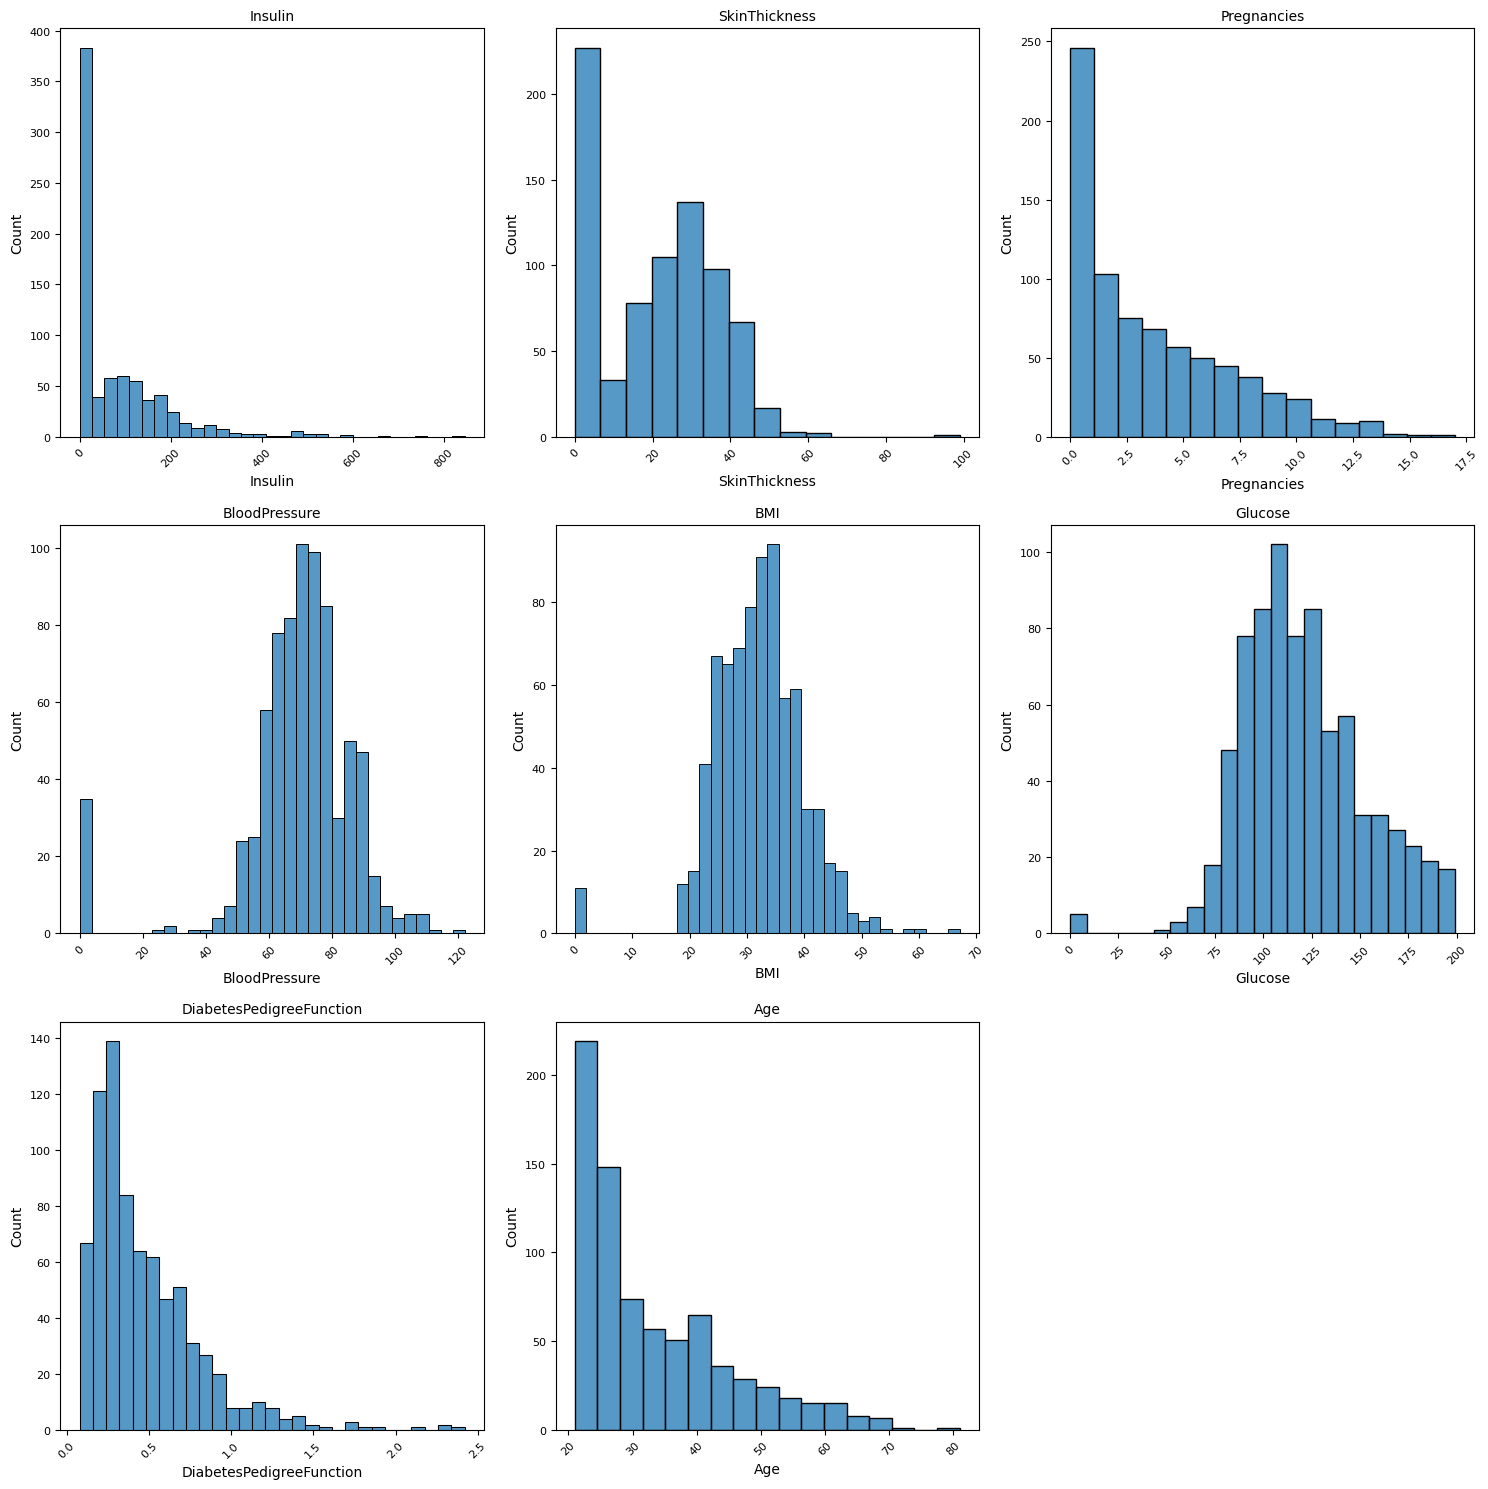

In [91]:


vars_to_plot = ['Insulin', 'SkinThickness', 'Pregnancies', 'BloodPressure', 'BMI', 'Glucose', 'DiabetesPedigreeFunction', 'Age']

fig, axes = plt.subplots(3, 3, figsize=(15, 15)) 
axes = axes.flatten()

for i, column in enumerate(vars_to_plot):
    sns.histplot(ax=axes[i], data=df, x=column)
    axes[i].set_title(column, fontsize=10) 
    axes[i].tick_params(axis='x', rotation=45, labelsize=8) 
    axes[i].tick_params(axis='y', labelsize=8) 

if len(vars_to_plot) < len(axes):
    fig.delaxes(axes[len(vars_to_plot)])

plt.tight_layout()
plt.show()

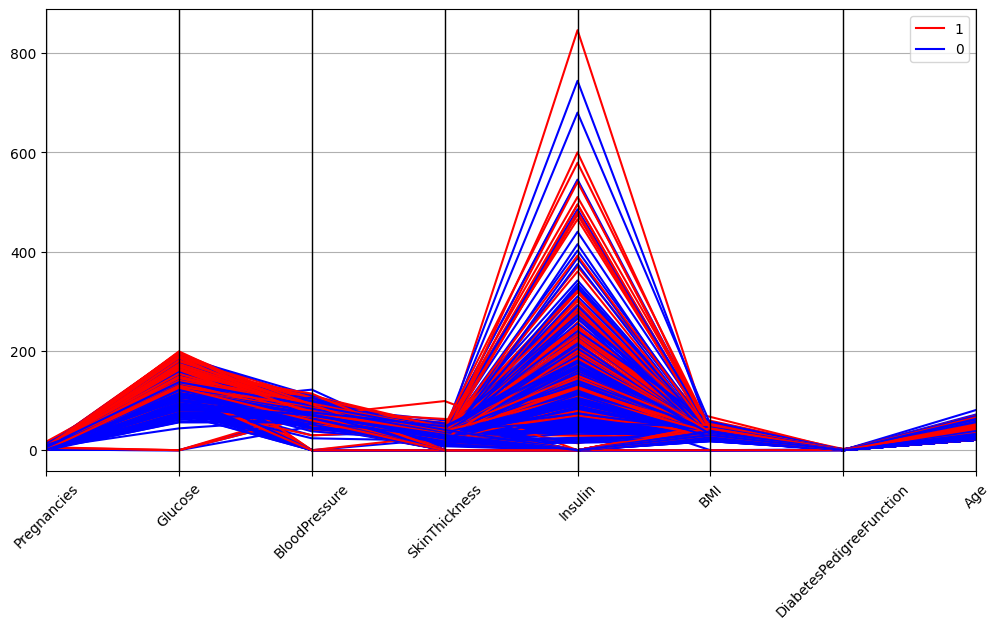

In [92]:
# Visualizamos la relación entre las características de nuestro dataset
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df, 'Outcome', color=['red', 'blue'])

plt.xticks(rotation=45)
plt.show()

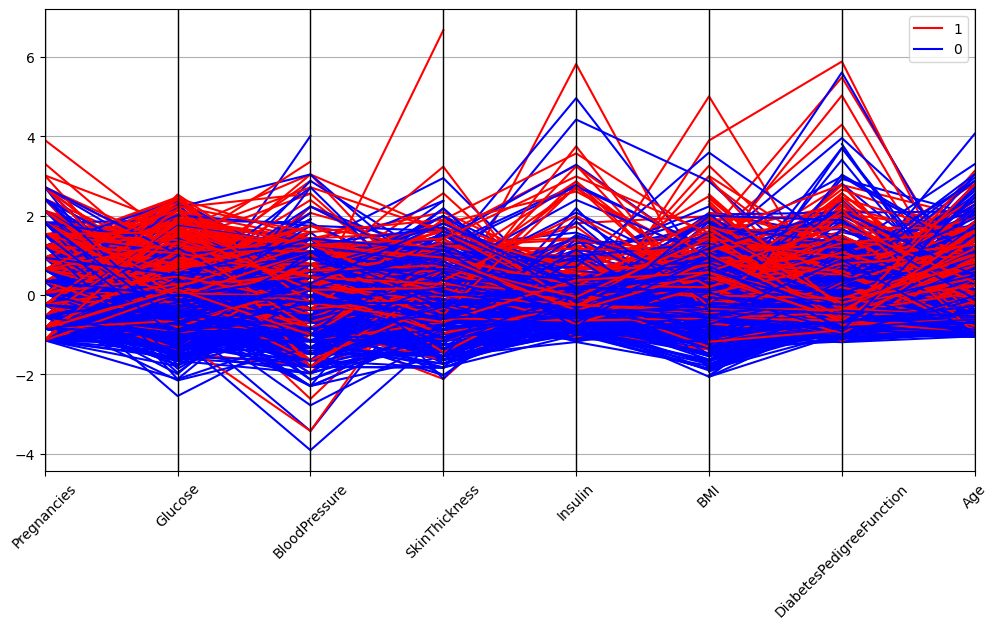

In [93]:
# VERSIÓN ESCALADA DEL DATASET PARA VISUALIZAR
df_sc = pd.DataFrame(data=StandardScaler().fit_transform(df_cop.drop(['Outcome'], axis=1)), columns=df_cop.columns[:-1])
df_sc['Outcome'] = df_cop.Outcome


# Visualizamos la relación entre las características de nuestro dataset
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df_sc, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()

## Train Test Split 

In [94]:
X = df_cop.drop('Outcome',axis=1)
y = df_cop['Outcome']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Outliers 

In [96]:
pd.set_option('display.float_format', '{:.3f}'.format)
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,614.000,3.743,3.313,0.000,1.000,3.000,6.000,17.000
Glucose,609.000,121.847,30.226,44.000,100.000,118.000,139.000,199.000
BloodPressure,590.000,72.239,12.343,24.000,64.000,72.000,80.000,122.000
SkinThickness,438.000,28.596,9.961,8.000,21.000,28.500,36.000,63.000
Insulin,324.000,154.330,119.818,14.000,78.000,120.000,183.250,846.000
BMI,607.000,32.352,6.975,18.200,27.300,32.000,36.500,67.100
DiabetesPedigreeFunction,614.000,0.469,0.337,0.078,0.241,0.372,0.614,2.420
Age,614.000,32.907,11.503,21.000,24.000,29.000,40.000,81.000


In [97]:
iso = IsolationForest(random_state=123)
df_num = X_train.copy()
df_num['outlier_flag'] = iso.fit_predict(X_train)
df_num['outlier_flag'].value_counts()

outlier_flag
 1    527
-1     87
Name: count, dtype: int64

In [98]:
outliers = df_num[df_num["outlier_flag"] == -1]
outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outlier_flag
618,9,112.000,82.000,24.000,NaN,28.200,1.282,50,-1
294,0,161.000,50.000,NaN,NaN,21.900,0.254,65,-1
306,10,161.000,68.000,23.000,132.000,25.500,0.326,47,-1
131,9,122.000,56.000,NaN,NaN,33.300,1.114,33,-1
673,3,123.000,100.000,35.000,240.000,57.300,0.880,22,-1
...,...,...,...,...,...,...,...,...,...
661,1,199.000,76.000,43.000,NaN,42.900,1.394,22,-1
458,10,148.000,84.000,48.000,237.000,37.600,1.001,51,-1
330,8,118.000,72.000,19.000,NaN,23.100,1.476,46,-1
466,0,74.000,52.000,10.000,36.000,27.800,0.269,22,-1


## Imputación 

In [99]:
imputer = MissForest()

X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)
X_train_imp

/home/vscode/.local/lib/python3.11/site-packages/missforest/missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:02<00:00,  2.38it/s]
/home/vscode/.local/lib/python3.11/site-packages/missforest/missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
/home/vscode/.local/lib/python3.11/site-packages/missforest/missforest.py:494: UserWarning: In version 4.2.3, estimator fitting process is moved to `fit` method. `MissForest` will now imputes unseen missing values with fitted estimators with `transform` method. To retain the old behaviour, use `fit_transform` to fit the whole unseen data instead.
  warnings.warn(f"In version {VERSION}, estimator fitting process "
100%|██████████| 5/5 [00:00<00:00, 65.35it/s]
/home/vscode/.local/lib/python3.11/site-packages/missforest/missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themse

,Pregnancies,Age,DiabetesPedigreeFunction,Glucose,BMI,BloodPressure,SkinThickness,Insulin
60,2,21,0.304,84.000,30.635,68.331,26.090,104.397
618,9,50,1.282,112.000,28.200,82.000,24.000,124.250
346,1,22,0.654,139.000,28.700,46.000,19.000,83.000
294,0,65,0.254,161.000,21.900,50.000,26.182,246.397
231,6,46,0.238,134.000,46.200,80.000,37.000,370.000
...,...,...,...,...,...,...,...,...
71,5,26,0.411,139.000,28.600,64.000,35.000,140.000
106,1,27,0.207,96.000,22.400,122.000,27.221,96.129
270,10,38,1.136,101.000,45.600,86.000,37.000,121.686
435,0,29,0.205,141.000,42.400,72.870,29.200,127.510


## Arboles de decision


In [100]:
simple_tree = DecisionTreeClassifier(max_depth=3, max_features=X_train.shape[1]//2, min_samples_leaf=20, random_state=42)
simple_tree.fit(X_train, y_train)

complex_tree = DecisionTreeClassifier(max_depth=100, min_samples_leaf=1, random_state=42)
complex_tree.fit(X_train, y_train)

# Evaluar el modelo complejo en entrenamiento y prueba
train_pred_complex = complex_tree.predict(X_train)
test_pred_complex = complex_tree.predict(X_test)

# Evaluar el modelo simple en entrenamiento y prueba
train_pred_simple = simple_tree.predict(X_train)
test_pred_simple = simple_tree.predict(X_test)

### Get metrics 

In [101]:

def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    #train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    #test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    #diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall,],[test_accuracy, test_f1, test_auc, test_precision, test_recall],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [102]:
metrics_complex = get_metrics(y_train, y_test, train_pred_complex, test_pred_complex)
metrics_complex


,Accuracy,F1,AUC,Precision,Recall
Train,0.997,0.995,0.995,1.000,0.991
Test,0.740,0.643,0.721,0.632,0.655
Diferencia,0.256,0.352,0.274,0.368,0.336


In [103]:
metrics_simple = get_metrics(y_train, y_test, train_pred_simple, test_pred_simple)
metrics_simple

,Accuracy,F1,AUC,Precision,Recall
Train,0.770,0.704,0.775,0.636,0.789
Test,0.688,0.652,0.717,0.542,0.818
Diferencia,0.082,0.052,0.057,0.094,-0.029


### Matriz de confusión

In [105]:
# Matriz de confusión
cm = confusion_matrix(y_test, test_pred_simple)
cm

array([[61, 38],
       [10, 45]])

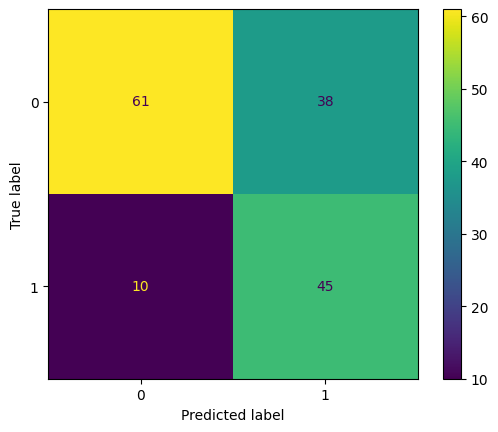

In [106]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()

In [107]:

#text_representation = export_text(simple_tree, feature_names=list(X_train.columns))
#rint(text_representation)

## Criterios de pureza

In [108]:
model = DecisionTreeClassifier()

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 4, 5, 6, 8, None],
              'min_samples_leaf': [5, 10, 15, 20, 25],
              'max_features': [None, 'sqrt', 'log2', 0.5],
              'min_samples_split': [2, 5, 10, 20]}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Ajuste
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=5; total time=   0.0s


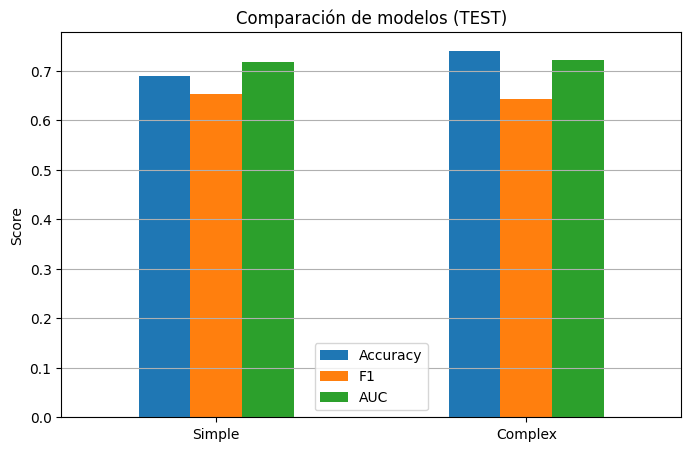

In [109]:
metrics_test = pd.DataFrame({
    'Simple': metrics_simple.loc['Test'],
    'Complex': metrics_complex.loc['Test']
}).T

metrics_test[['Accuracy', 'F1', 'AUC']].plot(
    kind='bar',
    figsize=(8,5)
)

plt.title('Comparación de modelos (TEST)')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

## Exportación del Modelo 

In [110]:
joblib.dump(model, 'modelo_dt_diabetes.pkl')

['modelo_dt_diabetes.pkl']